# Probability Density Visualization using ChronoFlow

_To use this model, the *zuko* and *PyTorch* libraries must be installed. Refer to the README for more information._

### 1. Loading the model

First we import all of the necessary dependencies. For this tutorial, in addition to the pre-requisites listed in the main README file, we use ```scipy.special``` to help with the convolution of distributions.

In [1]:
import sys
sys.path.append('/Users/philvanlane/Documents/chronoflow/chronoflow')

import numpy as np
import zuko
import matplotlib.pyplot as plt
import torch
import scipy.special as sp
from ChronoFlow import *

We initialize our ChronoFlow object my providing the path to the model weights (this uses zuko).

In [2]:
myCF = ChronoFlow(weights_file='../chronoflow/model_artifacts/weights.pth')

### 2. Probability grid over colour and rotation period at a static age

We can construct a probability grid over colour and rotation period for any given age and photometric uncertainty. By default, a resolution of 200 grid points is used for both colour and rotation period, with limits of [-0.5,5] in colour and [-1.75,2.5] in log rotation period. The resolution can be reduced for a quicker runtime; this should take approximately 1 minute at a resolution of 200.

In [6]:
probGridProtBPRP0 = myCF.calcProbsAtAge(
    logA_Myr=2,
    logCerr=-2
)

We can now visualize this density plot. It is important to note that due to the conditional nature of these probability densities, each vertical line through this plot should integrate to 1; we do not expect the entire plot to integrate to 1.

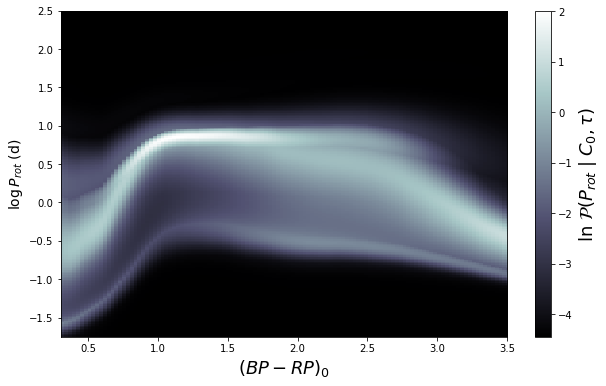

In [8]:
# Grid in colour and rotation period
res = 200
prior_prot = [-1.75,2.5]
prior_bprp = [-0.5,5]
BPRP_grid = np.linspace(prior_bprp[0],prior_bprp[1],res)
logP_grid = np.linspace(prior_prot[1],prior_prot[0],res)

# Plot
plt.figure(figsize=(10,6))

plt.imshow(probGridProtBPRP0,
   cmap='bone',
   aspect='auto',
   interpolation='nearest',
   extent=(prior_bprp[0],prior_bprp[1],prior_prot[0],prior_prot[1]),
   norm='linear',
   origin='lower')
plt.xlabel(r'$(BP-RP)_0$',fontsize=18)
plt.ylabel(r'$\log P_{rot}$ (d)',fontsize=14)
plt.xlim(0.3,3.5)

cb = plt.colorbar()  # Use data to link the colorbar
cb.set_label(r'ln $\mathcal{P}(P_{rot}\;|\;C_0,\tau)$', fontsize=18) 
cb.ax.tick_params(labelsize=10)

### 3. Probability grid over rotation period and age at a static colour

In addition to viewing the probability distribution in colour and rotation period at a snapshot in time, we can also view how the probability distribution of rotation period is expected to evolve over time for stars of a given colour.

In [9]:
probGridProtAge = myCF.calcProbsAtColour(
    BPRP0=2,
    logCerr=-2
)

We can visualize this plot as well.

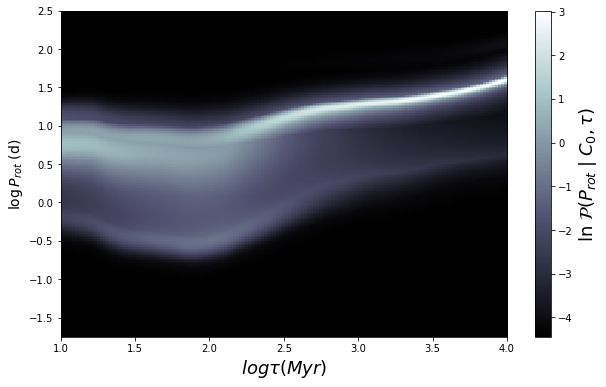

In [11]:
# Grid in colour and rotation period
res = 200
prior_prot = [-1.75,2.5]
prior_logA_Myr = [0,4.14]
logA_Myr_grid = np.linspace(prior_logA_Myr[0],prior_logA_Myr[1],res)
logP_grid = np.linspace(prior_prot[0],prior_prot[1],res)

# Plot
plt.figure(figsize=(10,6))

plt.imshow(probGridProtAge,
   cmap='bone',
   aspect='auto',
   interpolation='nearest',
   extent=(prior_logA_Myr[0],prior_logA_Myr[1],prior_prot[0],prior_prot[1]),
   norm='linear',
   origin='lower')
plt.xlabel(r'$log \tau (Myr)$',fontsize=18)
plt.ylabel(r'$\log P_{rot}$ (d)',fontsize=14)
plt.xlim(1,4)

cb = plt.colorbar()  # Use data to link the colorbar
cb.set_label(r'ln $\mathcal{P}(P_{rot}\;|\;C_0,\tau)$', fontsize=18) 
cb.ax.tick_params(labelsize=10)